# **RFM (Recency Frequency Monetary) Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime
import datetime as dt
import warnings
from sklearn.cluster import KMeans

In [2]:
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Read file CSV
Customer = pd.read_csv('Dim_customer.csv')
Employee = pd.read_csv('Dim_employee.csv')
Product = pd.read_csv('Dim_product.csv')
Store = pd.read_csv('Dim_store.csv')
Sales2020 = pd.read_csv('Historical_sales2020.csv')
Sales2021 = pd.read_csv('Historical_sales2021.csv')
Sales2022 = pd.read_csv('Historical_sales2022.csv')

In [5]:
Customer

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890
1,2,3,M,Clark Schroeder,7/30/1950,Nora@fames.gov,1/7/2017,032-732-6308
2,3,3,M,Elvis Cardenas,9/30/1950,Brianna@tellus.edu,1/10/2017,459-375-9187
3,4,3,M,Rafael Estes,12/1/1950,Ina@non.gov,1/13/2017,576-640-9226
4,5,3,M,Colin Lynn,2/1/1951,Dale@Integer.com,1/15/2017,344-674-6569
...,...,...,...,...,...,...,...,...
2246,8498,8,Not Specified,April,12/7/2000,Daniel@placerat.us,1/20/2019,705-545-5246
2247,8499,8,F,Clementine,6/4/1996,Dieter@ac.us,11/9/2017,297-550-7776
2248,8500,8,Not Specified,Linda,3/1/1990,Dillon@pretium.gov,8/21/2017,255-202-7435
2249,8501,8,F,Moana,8/27/1966,Herrod@ultrices.gov,7/6/2018,241-906-4009


In [6]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2251 non-null   int64 
 1   home_store           2251 non-null   int64 
 2   gender               2251 non-null   object
 3   customer_first-name  2251 non-null   object
 4   birthdate            2251 non-null   object
 5   customer_email       2251 non-null   object
 6   customer_since       2251 non-null   object
 7   loyalty_card_number  2251 non-null   object
dtypes: int64(2), object(6)
memory usage: 140.8+ KB


In [7]:
Store

,store_id,store_type,store_square_feet,store_address,store_city,store_state_province,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,11106,-73.924008,40.761196,6.0,Astoria
2,5,retail,900,100 Church Street,New York,NY,10007,-74.010130,40.713290,16.0,Lower Manhattan
3,8,retail,1500,687 9th Avenue,New York,NY,10036,-73.990338,40.761887,31.0,Hell's Kitchen


In [8]:
Customer_22 = pd.merge(Customer, Sales2022, on = "customer_id")
Customer_21 = pd.merge(Customer, Sales2021, on = "customer_id")
Customer_20 = pd.merge(Customer, Sales2020, on = "customer_id")

In [9]:
Customer_20.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn
0,5033,5,F,Nola,3/9/1975,Ria@condimentum.com,2/10/2018,523-304-4054,245,3/21/2020,7:40:01,5,30,87,3,"2,1",Y
1,5033,5,F,Nola,3/9/1975,Ria@condimentum.com,2/10/2018,523-304-4054,245,3/21/2020,7:40:01,5,30,72,3,"2,65",Y
2,5033,5,F,Nola,3/9/1975,Ria@condimentum.com,2/10/2018,523-304-4054,245,4/21/2020,7:40:01,5,30,87,3,"2,1",Y
3,5033,5,F,Nola,3/9/1975,Ria@condimentum.com,2/10/2018,523-304-4054,245,4/21/2020,7:40:01,5,30,72,3,"2,65",Y
4,5033,5,F,Nola,3/9/1975,Ria@condimentum.com,2/10/2018,523-304-4054,245,5/21/2020,7:40:01,5,30,87,3,"2,1",Y


In [10]:
Customer_21.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,1/2/2021,15:14,3,12,32,1,3,N
1,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,235,1/3/2021,15:01,3,17,37,1,3,N
2,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,662,1/19/2021,8:53,3,14,28,2,2,N
3,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,3019,1/26/2021,7:28,3,14,23,1,"2,5",N
4,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,235,2/3/2021,15:01,3,17,37,1,3,N


In [11]:
Customer_22.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,1/2/2022,15:14:00,3,12,32,1,3.0,N
1,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,662,1/19/2022,8:53:00,3,14,28,2,2.0,N
2,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,3019,1/26/2022,7:28:00,3,14,23,1,2.5,N
3,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,2112,1/26/2022,9:59:00,3,14,58,1,3.5,N
4,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2/2/2022,15:14:00,3,12,32,1,3.0,N


In [12]:
Customer_21['unit_price'] = Customer_21['unit_price'].str.replace(',','.').astype(float)
Customer_20['unit_price'] = Customer_20['unit_price'].str.replace(',','.').astype(float)

In [13]:
# Merge Customer dataset for 3 years
Customer_all = pd.concat([Customer_22, Customer_21, Customer_20], axis = 0)
Customer_all.sort_values('customer_id')
Customer_all

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,1/2/2022,15:14:00,3,12,32,1,3.0,N
1,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,662,1/19/2022,8:53:00,3,14,28,2,2.0,N
2,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,3019,1/26/2022,7:28:00,3,14,23,1,2.5,N
3,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,2112,1/26/2022,9:59:00,3,14,58,1,3.5,N
4,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2/2/2022,15:14:00,3,12,32,1,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,5,12/28/2020,15:03:48,8,45,87,1,2.1,Y
3498,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,660,12/28/2020,19:17:17,8,15,87,1,2.1,Y
3499,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,1,12/29/2020,8:48:11,8,45,87,2,2.1,Y
3500,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,255,12/29/2020,17:12:13,8,15,87,2,2.1,Y


In [14]:
Customer_all['transaction_date'] = pd.to_datetime(Customer_all['transaction_date'])

In [15]:
Customer_all.isnull().sum()

customer_id            0
home_store             0
gender                 0
customer_first-name    0
birthdate              0
customer_email         0
customer_since         0
loyalty_card_number    0
transaction_id         0
transaction_date       0
transaction_time       0
store_id               0
staff_id               0
product_id             0
quantity_sold          0
unit_price             0
promo_item_yn          0
dtype: int64

In [16]:
Customer_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553315 entries, 0 to 3501
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          553315 non-null  int64         
 1   home_store           553315 non-null  int64         
 2   gender               553315 non-null  object        
 3   customer_first-name  553315 non-null  object        
 4   birthdate            553315 non-null  object        
 5   customer_email       553315 non-null  object        
 6   customer_since       553315 non-null  object        
 7   loyalty_card_number  553315 non-null  object        
 8   transaction_id       553315 non-null  int64         
 9   transaction_date     553315 non-null  datetime64[ns]
 10  transaction_time     553315 non-null  object        
 11  store_id             553315 non-null  int64         
 12  staff_id             553315 non-null  int64         
 13  product_id      

In [17]:
Customer_all.describe()

,customer_id,home_store,transaction_id,store_id,staff_id,product_id,quantity_sold,unit_price
count,553315.000000,553315.000000,553315.000000,553315.000000,553315.000000,553315.000000,553315.000000,553315.000000
mean,4941.774056,5.341393,846.754487,5.341393,25.322341,48.072742,1.437331,3.377920
std,3248.569555,2.071523,849.729672,2.071523,12.441507,18.064032,0.542233,2.656105
min,1.000000,3.000000,1.000000,3.000000,6.000000,1.000000,1.000000,0.800000
25%,1000.000000,3.000000,216.000000,3.000000,15.000000,34.000000,1.000000,2.500000
50%,5892.000000,5.000000,457.000000,5.000000,26.000000,47.000000,1.000000,3.000000
75%,8294.000000,8.000000,1358.000000,8.000000,41.000000,60.000000,2.000000,3.750000
max,8600.000000,8.000000,4203.000000,8.000000,45.000000,87.000000,8.000000,45.000000


In [18]:
Customer_all[Customer_all.quantity_sold < 0]

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn


In [19]:
Customer_all[Customer_all.unit_price < 0]

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn


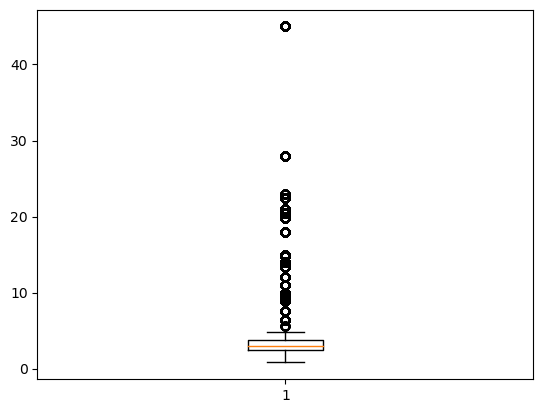

In [20]:
fig, ax = plt.subplots()
ax.boxplot(Customer_all['unit_price'])
plt.show()

In [21]:
Q1 = np.percentile(Customer_all['unit_price'], 25, method='midpoint')
Q3 = np.percentile(Customer_all['unit_price'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1.25


In [22]:
upper = Q3+1.5*IQR
upper_array = np.array(Customer_all['unit_price'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
 
lower = Q1-1.5*IQR
lower_array = np.array(Customer_all['unit_price'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 5.625
15416
Lower Bound: 0.625
0


In [23]:
Customer_all = Customer_all[(Customer_all["unit_price"] > lower) & (Customer_all["unit_price"] < upper)]
Customer_all

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2022-01-02,15:14:00,3,12,32,1,3.0,N
1,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,662,2022-01-19,8:53:00,3,14,28,2,2.0,N
2,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,3019,2022-01-26,7:28:00,3,14,23,1,2.5,N
3,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,2112,2022-01-26,9:59:00,3,14,58,1,3.5,N
4,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2022-02-02,15:14:00,3,12,32,1,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,5,2020-12-28,15:03:48,8,45,87,1,2.1,Y
3498,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,660,2020-12-28,19:17:17,8,15,87,1,2.1,Y
3499,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,1,2020-12-29,8:48:11,8,45,87,2,2.1,Y
3500,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,255,2020-12-29,17:12:13,8,15,87,2,2.1,Y


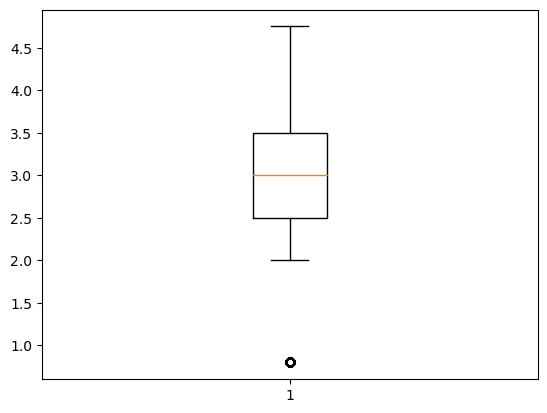

In [24]:
fig, ax = plt.subplots()
ax.boxplot(Customer_all['unit_price'])
plt.show()

In [25]:
Q1 = np.percentile(Customer_all['unit_price'], 25, method='midpoint')
Q3 = np.percentile(Customer_all['unit_price'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1.0


In [26]:
upper = Q3+1.5*IQR
upper_array = np.array(Customer_all['unit_price'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
 
lower = Q1-1.5*IQR
lower_array = np.array(Customer_all['unit_price'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 5.0
0
Lower Bound: 1.0
25040


In [27]:
Customer_all = Customer_all[(Customer_all["unit_price"] > lower) & (Customer_all["unit_price"] < upper)]
Customer_all

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2022-01-02,15:14:00,3,12,32,1,3.0,N
1,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,662,2022-01-19,8:53:00,3,14,28,2,2.0,N
2,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,3019,2022-01-26,7:28:00,3,14,23,1,2.5,N
3,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,2112,2022-01-26,9:59:00,3,14,58,1,3.5,N
4,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2022-02-02,15:14:00,3,12,32,1,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,5,2020-12-28,15:03:48,8,45,87,1,2.1,Y
3498,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,660,2020-12-28,19:17:17,8,15,87,1,2.1,Y
3499,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,1,2020-12-29,8:48:11,8,45,87,2,2.1,Y
3500,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,255,2020-12-29,17:12:13,8,15,87,2,2.1,Y


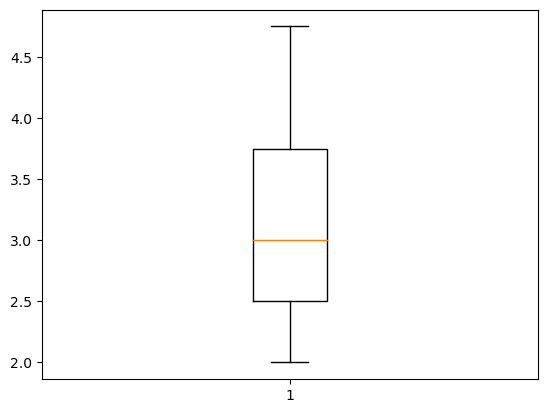

In [28]:
fig, ax = plt.subplots()
ax.boxplot(Customer_all['unit_price'])
plt.show()

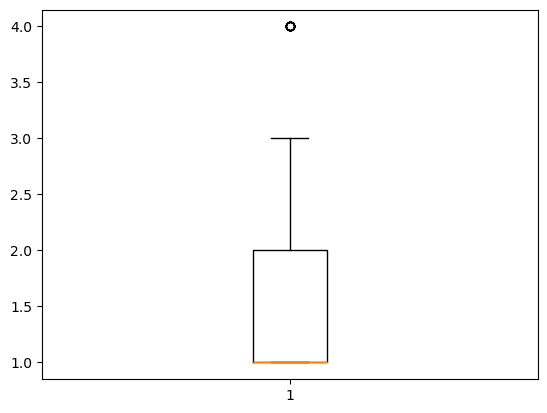

In [29]:
fig, ax = plt.subplots()
ax.boxplot(Customer_all['quantity_sold'])
plt.show()

In [30]:
Q1 = np.percentile(Customer_all['quantity_sold'], 25, method='midpoint')
Q3 = np.percentile(Customer_all['quantity_sold'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1.0


In [31]:
upper = Q3+1.5*IQR
upper_array = np.array(Customer_all['quantity_sold'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
 
lower = Q1-1.5*IQR
lower_array = np.array(Customer_all['quantity_sold'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 3.5
12
Lower Bound: -0.5
0


In [32]:
Customer_all = Customer_all[(Customer_all["quantity_sold"] > lower) & (Customer_all["quantity_sold"] < upper)]
Customer_all

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2022-01-02,15:14:00,3,12,32,1,3.0,N
1,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,662,2022-01-19,8:53:00,3,14,28,2,2.0,N
2,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,3019,2022-01-26,7:28:00,3,14,23,1,2.5,N
3,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,2112,2022-01-26,9:59:00,3,14,58,1,3.5,N
4,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2022-02-02,15:14:00,3,12,32,1,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,5,2020-12-28,15:03:48,8,45,87,1,2.1,Y
3498,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,660,2020-12-28,19:17:17,8,15,87,1,2.1,Y
3499,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,1,2020-12-29,8:48:11,8,45,87,2,2.1,Y
3500,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,1/1/2017,000-000-0008,255,2020-12-29,17:12:13,8,15,87,2,2.1,Y


Một trong những chiến lược trọng điểm của Meki Group trong thời gian tới là cải thiện và nâng cao trải nghiệm mua sắm của khách hàng, đẩy mạnh số lượng khách hàng mới và tăng tỷ lệ giữ chân khách hàng cũ. Do đó, công ty muốn bạn sử dụng kỹ năng phân tích để tính toán và phân chia các tệp khách hàng mới và khách hàng trung thành thông qua lịch sử mua hàng trong bộ dataset đã cung cấp

Để phân chia các khách hàng mới và khách hàng trung thành dựa trên lịch sử mua hàng, mình sử dụng phân tích RFM (Recency, Frequency, Monetary). Phân tích RFM là một phương pháp dựa trên hành vi để nhóm khách hàng vào các phân khúc. Nó nhóm các khách hàng dựa trên các tiêu chí sau:

- Recency: là khoảng thời gian kể từ lần mua hàng gần nhất của khách hàng. Khách hàng có recency nhỏ thường có xu hướng mua hàng nhiều hơn và là khách hàng trung thành.
- Frequency: là số lần mua hàng của khách hàng trong một khoảng thời gian nhất định. Khách hàng có frequency cao thường có nhu cầu mua hàng lớn và là khách hàng tiềm năng.
- Monetary: là tổng số tiền mà khách hàng đã chi tiêu cho các sản phẩm trong một khoảng thời gian nhất định. Khách hàng có monetary cao thường có giá trị cao và là khách hàng quan trọng.

## Recency

In [33]:
now = dt.date(2022,6,28)
now = pd.to_datetime(now)
now

Timestamp('2022-06-28 00:00:00')

In [34]:
# Last time the customer Purchase 
Recency = Customer_all.groupby(by='customer_id',as_index=False)['transaction_date'].max()
Recency.columns = ['Customer_id', 'Last_Purchase_Date']

# Convert Last_Purchase_Date to datetime
Recency["Last_Purchase_Date"] = pd.to_datetime(Recency["Last_Purchase_Date"])

#Calculate Recency
Recency['Recency'] = Recency.Last_Purchase_Date.apply(lambda x : (now - x).days)

In [35]:
Recency

,Customer_id,Last_Purchase_Date,Recency
0,1,2022-04-29,60
1,2,2022-04-26,63
2,3,2022-04-24,65
3,4,2022-04-26,63
4,5,2022-04-29,60
...,...,...,...
2245,8498,2022-04-27,62
2246,8499,2022-04-29,60
2247,8500,2022-04-26,63
2248,8501,2022-04-28,61


In [36]:
Recency.drop(columns=['Last_Purchase_Date'],inplace=True)
Recency.head()

,Customer_id,Recency
0,1,60
1,2,63
2,3,65
3,4,63
4,5,60


## Frequency

In [37]:
Frequency = Customer_all.copy()
Frequency.drop_duplicates(subset=['customer_id','transaction_id'],keep="first",inplace=True)
Frequency

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2022-01-02,15:14:00,3,12,32,1,3.00,N
1,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,662,2022-01-19,8:53:00,3,14,28,2,2.00,N
2,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,3019,2022-01-26,7:28:00,3,14,23,1,2.50,N
3,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,2112,2022-01-26,9:59:00,3,14,58,1,3.50,N
5,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,235,2022-02-03,15:01:00,3,17,37,1,3.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292050,8166,8,M,Aristotle,3/15/1992,Lesley@est.gov,6/6/2018,174-388-6640,1474,2021-04-17,10:31,8,6,24,2,3.00,N
292163,8167,8,M,Dean,1/16/1953,Madeline@nisi.gov,3/14/2018,979-135-1641,1271,2021-01-17,8:53,8,6,35,2,3.10,N
300509,8235,8,F,Winter,11/24/1958,Salvador@dapibus.edu,8/18/2017,147-702-5057,1160,2021-01-17,8:10,8,44,27,2,3.50,N
322029,8405,8,F,Ruby,11/29/1969,Mari@per.org,1/4/2018,785-775-1527,1365,2021-04-17,7:16,8,44,40,2,3.75,N


In [38]:
Frequency = Frequency.drop_duplicates().groupby(
    by=['customer_id'], as_index=False)['transaction_date'].count()
Frequency.columns = ['Customer_id', 'Frequency']

In [39]:
Frequency

,Customer_id,Frequency
0,1,6
1,2,16
2,3,13
3,4,7
4,5,6
...,...,...
2245,8498,7
2246,8499,10
2247,8500,17
2248,8501,6


## Monetary

In [40]:
# Calculate the revenue of company 
Customer_all['Revenue'] = Customer_all['unit_price'] * Customer_all['quantity_sold']

In [41]:
Customer_all.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,transaction_id,transaction_date,transaction_time,store_id,staff_id,product_id,quantity_sold,unit_price,promo_item_yn,Revenue
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2022-01-02,15:14:00,3,12,32,1,3.0,N,3.0
1,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,662,2022-01-19,8:53:00,3,14,28,2,2.0,N,4.0
2,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,3019,2022-01-26,7:28:00,3,14,23,1,2.5,N,2.5
3,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,2112,2022-01-26,9:59:00,3,14,58,1,3.5,N,3.5
4,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,1783,2022-02-02,15:14:00,3,12,32,1,3.0,N,3.0


In [42]:
# Find Revenue from each Customer
Monetary = Customer_all.groupby(by='customer_id', as_index=False)['Revenue'].sum()
Monetary.columns = ['Customer_id', 'Monetary']
Monetary.head()

,Customer_id,Monetary
0,1,333.00
1,2,913.65
2,3,1371.65
3,4,305.95
4,5,276.00


## Merging all three columns in one dataframe

In [43]:
#Ghép dữ liệu Recency với Frequency
RF = Recency.merge(Frequency,left_on='Customer_id',right_on='Customer_id')
RF.head()

,Customer_id,Recency,Frequency
0,1,60,6
1,2,63,16
2,3,65,13
3,4,63,7
4,5,60,6


In [44]:
#Ghép với dữ liệu Monetary
RFM = RF.merge(Monetary, left_on='Customer_id',right_on='Customer_id')
RFM.set_index('Customer_id',inplace=True)
RFM.head()

,Recency,Frequency,Monetary
Customer_id,,,
1,60,6,333.00
2,63,16,913.65
3,65,13,1371.65
4,63,7,305.95
5,60,6,276.00


## Clustering with K means

In [45]:
rfm_segmentation = RFM.copy()

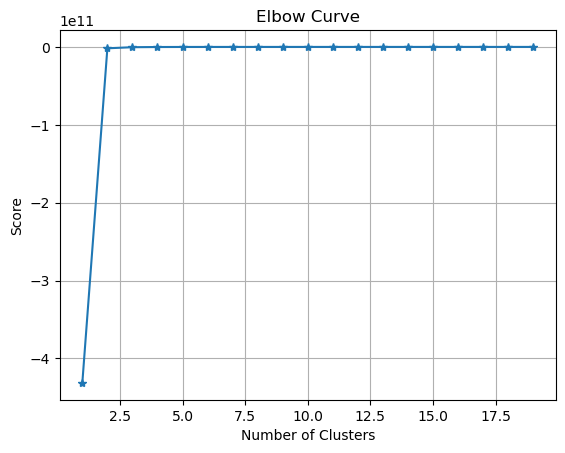

In [46]:
#Xác định số cụm tối ưu cho thuật toán KMeans
#Kiểm tra số cụm từ 1-20 tính score để xác định số cụm phù hợp
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score,marker='*')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid()
plt.title('Elbow Curve')
plt.show()

In [47]:
#Chọn số cụm K=3
kmeans = KMeans(n_clusters = 3, random_state=0).fit(rfm_segmentation)

In [48]:
#thêm nhãn cụm vào dữ liệu sau khi phân cụm
rfm_segmentation['cluster'] = kmeans.labels_
rfm_segmentation.head(10)

,Recency,Frequency,Monetary,cluster
Customer_id,,,,
1,60,6,333.00,0
2,63,16,913.65,0
3,65,13,1371.65,0
4,63,7,305.95,0
5,60,6,276.00,0
6,68,9,503.00,0
7,61,9,595.10,0
8,63,10,631.05,0
9,63,9,505.05,0


In [49]:
#Thống kê số lượng theo từng cụm
rfm_segmentation['cluster'].value_counts()

0    2247
1       2
2       1
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='Monetary'>

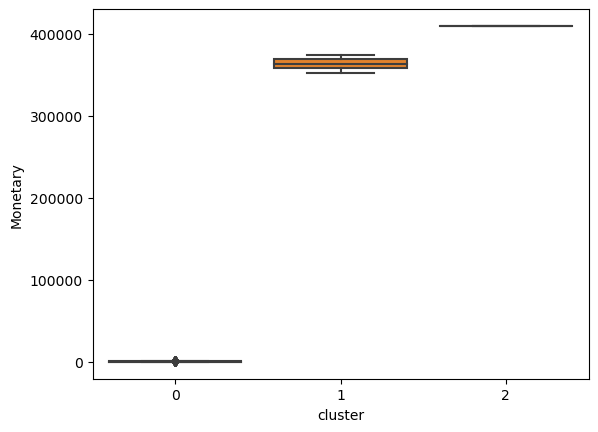

In [50]:
sns.boxplot(x='cluster', y='Monetary', data=rfm_segmentation)

- cluster 0 have low Monetary rate which is bad. cluster 2 have highest Montary (money spend) platinum where as cluster 1 have medium level(Gold) and cluster 0 is silver customer. 

<Axes: xlabel='cluster', ylabel='Recency'>

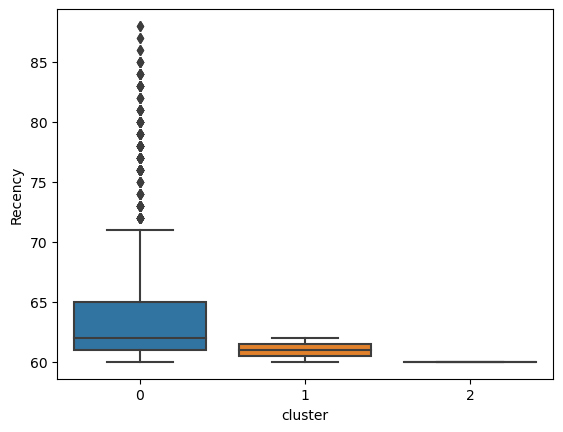

In [51]:
sns.boxplot(x='cluster', y='Recency', data=rfm_segmentation)

- cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum and gold customer.

<Axes: xlabel='cluster', ylabel='Frequency'>

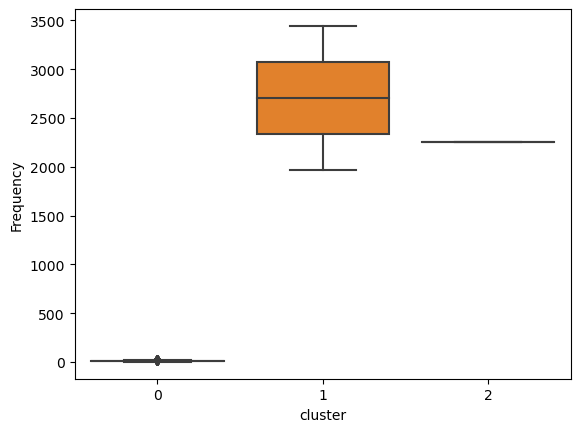

In [52]:
sns.boxplot(x='cluster', y='Frequency', data=rfm_segmentation)

- cluster 0 have low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in race of platinum and gold customer.

### **KẾT LUẬN**
---
Dựa trên kết quả phân đoạn:
* Cụm 0: Nhóm khách hàng Bạc (Silver customers)
* Cụm 1: Nhóm khách hàng Bạch Kim (Platinu customers)
* Cụm 2: Nhóm khách hàng Vàng (Gold customers)

## Ranking Customer’s based upon their recency, frequency, and monetary score

In [53]:
# Ranking fine scoring criteria for each RFM value
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [54]:
# Calculate RFM scores
quantile = RFM.quantile(q=[0.25,0.5,0.75])
quantile

,Recency,Frequency,Monetary
0.25,61.0,6.0,349.1625
0.50,62.0,8.0,493.5000
0.75,65.0,11.0,662.0125


In [55]:
# Convert RFM scores to numeric type
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile
Customer_id,,,,,,,
1,60,6,333.00,0,1,4,4
2,63,16,913.65,0,3,1,1
3,65,13,1371.65,0,3,1,1
4,63,7,305.95,0,3,3,4
5,60,6,276.00,0,1,4,4


In [56]:
quantile.to_dict()

{'Recency': {0.25: 61.0, 0.5: 62.0, 0.75: 65.0},
 'Frequency': {0.25: 6.0, 0.5: 8.0, 0.75: 11.0},
 'Monetary': {0.25: 349.16249999999997, 0.5: 493.5, 0.75: 662.0125}}

In [57]:
#calculate RFM score

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer_id,,,,,,,,
1,60,6,333.00,0,1,4,4,144
2,63,16,913.65,0,3,1,1,311
3,65,13,1371.65,0,3,1,1,311
4,63,7,305.95,0,3,3,4,334
5,60,6,276.00,0,1,4,4,144


In [58]:
rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + \
                                rfm_segmentation['F_Quartile'] + \
                                rfm_segmentation['M_Quartile']

rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
Customer_id,,,,,,,,,
1,60,6,333.00,0,1,4,4,144,9
2,63,16,913.65,0,3,1,1,311,5
3,65,13,1371.65,0,3,1,1,311,5
4,63,7,305.95,0,3,3,4,334,10
5,60,6,276.00,0,1,4,4,144,9


In [59]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  210
Loyal Customers:  474
Big Spenders:  563
Almost Lost:  26
Lost Customers:  76
Lost Cheap Customers:  222


In [60]:
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
Customer_id,,,,,,,,,
8600,60,2257,409907.40,2,1,1,1,111,3
1000,60,3444,374855.05,1,1,1,1,111,3
8285,60,25,1555.35,0,1,1,1,111,3
8297,60,23,1495.15,0,1,1,1,111,3
8384,60,23,1488.90,0,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
17,70,1,65.10,0,4,4,4,444,12
5813,78,2,64.00,0,4,4,4,444,12
359,86,1,55.00,0,4,4,4,444,12


<Axes: xlabel='Total_score'>

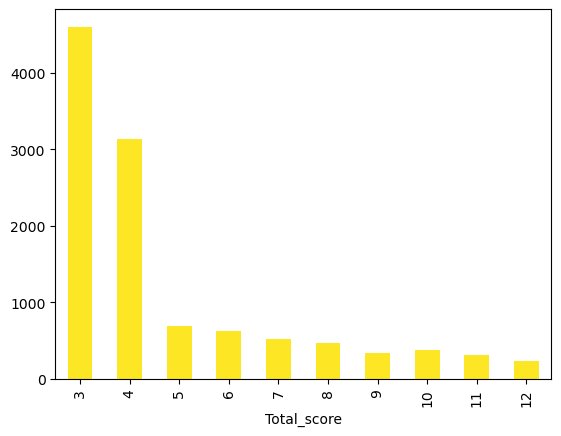

In [61]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap ='viridis_r')

<Axes: xlabel='Total_score'>

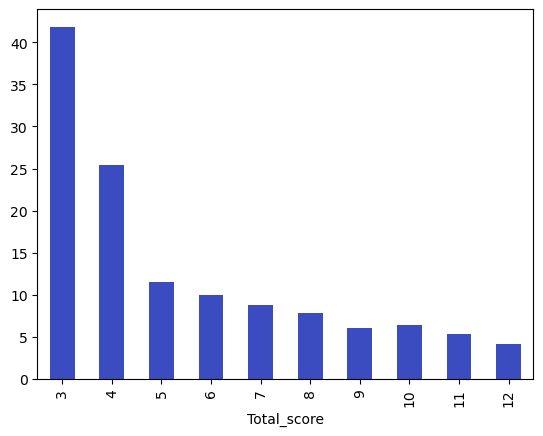

In [62]:
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='coolwarm')

<Axes: xlabel='Total_score'>

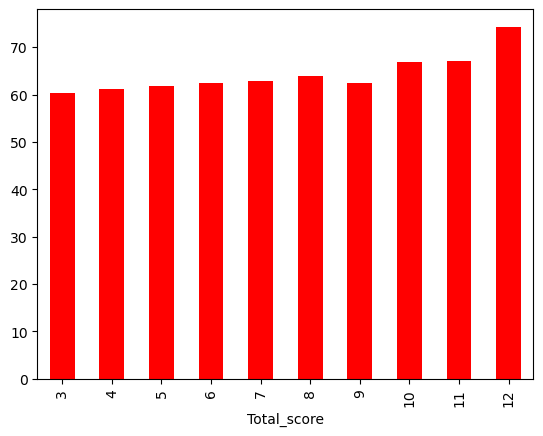

In [63]:
rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='bwr_r')